In [4]:
import sys
sys.path.append('../')  # Adjust the path to point to the parent directory of 'scripts'

import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from plotly.subplots import make_subplots

from scripts.utils import load_data
from scripts.utils_features import calculate_rsi, calculate_macd

In [3]:
symbol = 'BROCCOLIUSDT'
interval = '5'  # Kline interval (1m, 5m, 15m, etc.)

df_data_kline = load_data(f'../data/kline/{symbol}/{interval}')

date_start = '2025-02-21'

df_data_kline['startTime'] = pd.to_datetime(df_data_kline['startTime'], unit='ms')
df_data_kline = df_data_kline[df_data_kline['startTime'] >= date_start]

df_data_kline['closePrice_pct_change_1h'] = df_data_kline['closePrice'].pct_change(periods=12) * 100  # 12 intervals of 5 minutes each make 1 hour
df_data_kline['closePrice_pct_change_4h'] = df_data_kline['closePrice'].pct_change(periods=48) * 100  # 12 intervals of 5 minutes each make 1 hour
df_data_kline['closePrice_pct_change_12h'] = df_data_kline['closePrice'].pct_change(periods=144) * 100  # 12 intervals of 5 minutes each make 1 hour
df_data_kline['closePrice_pct_change_24h'] = df_data_kline['closePrice'].pct_change(periods=288) * 100  # 12 intervals of 5 minutes each make 1 hour

df_data_kline['closePrice_zscore_1h'] = (df_data_kline['closePrice'] - df_data_kline['closePrice'].rolling(12).mean()) / df_data_kline['closePrice'].rolling(12).std()
df_data_kline['closePrice_zscore_4h'] = (df_data_kline['closePrice'] - df_data_kline['closePrice'].rolling(48).mean()) / df_data_kline['closePrice'].rolling(12).std()
df_data_kline['closePrice_zscore_12h'] = (df_data_kline['closePrice'] - df_data_kline['closePrice'].rolling(144).mean()) / df_data_kline['closePrice'].rolling(12).std()
df_data_kline['closePrice_zscore_24h'] = (df_data_kline['closePrice'] - df_data_kline['closePrice'].rolling(288).mean()) / df_data_kline['closePrice'].rolling(12).std()

df_data_kline['rsi_1h'] = calculate_rsi(df_data_kline, period=12)
df_data_kline['rsi_4h'] = calculate_rsi(df_data_kline, period=48)
df_data_kline['rsi_12h'] = calculate_rsi(df_data_kline, period=144)
df_data_kline['rsi_24h'] = calculate_rsi(df_data_kline, period=288)

df_data_kline['macd_line'], df_data_kline['macd_signal'], df_data_kline['macd_histogram'] = calculate_macd(df_data_kline)

c:\workspace\crypto\janebot-analytics\notebooks\..\scripts\utils.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_data = pd.concat(all_files, ignore_index=True)


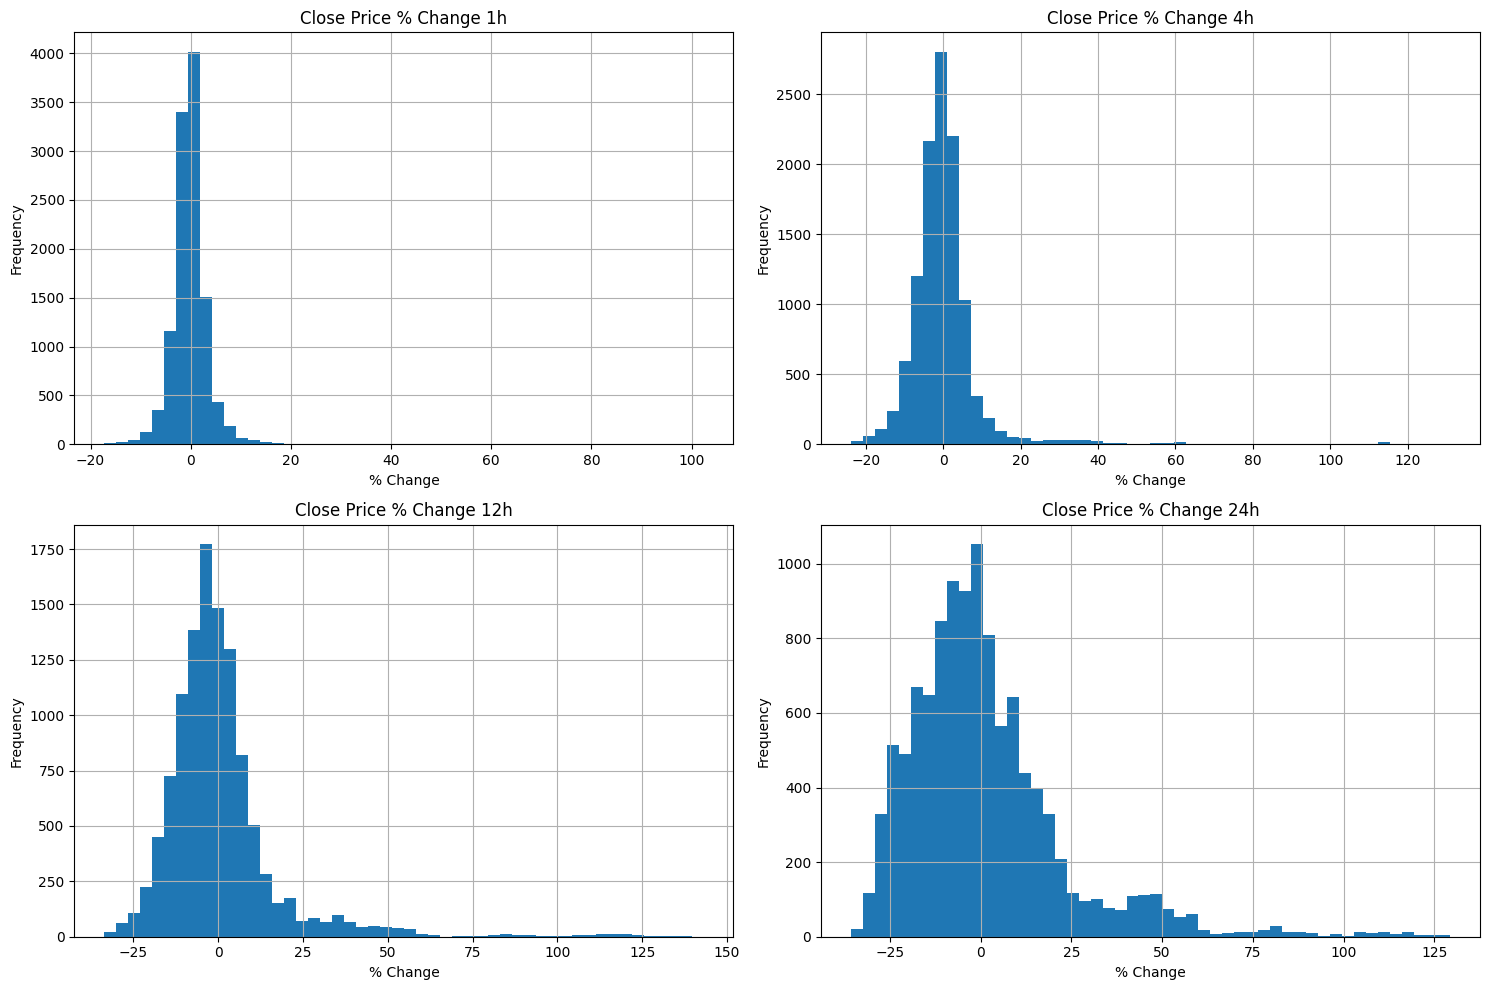

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

df_data_kline['closePrice_pct_change_1h'].hist(bins=50, ax=axes[0, 0])
axes[0, 0].set_title('Close Price % Change 1h')
axes[0, 0].set_xlabel('% Change')
axes[0, 0].set_ylabel('Frequency')

df_data_kline['closePrice_pct_change_4h'].hist(bins=50, ax=axes[0, 1])
axes[0, 1].set_title('Close Price % Change 4h')
axes[0, 1].set_xlabel('% Change')
axes[0, 1].set_ylabel('Frequency')

df_data_kline['closePrice_pct_change_12h'].hist(bins=50, ax=axes[1, 0])
axes[1, 0].set_title('Close Price % Change 12h')
axes[1, 0].set_xlabel('% Change')
axes[1, 0].set_ylabel('Frequency')

df_data_kline['closePrice_pct_change_24h'].hist(bins=50, ax=axes[1, 1])
axes[1, 1].set_title('Close Price % Change 24h')
axes[1, 1].set_xlabel('% Change')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


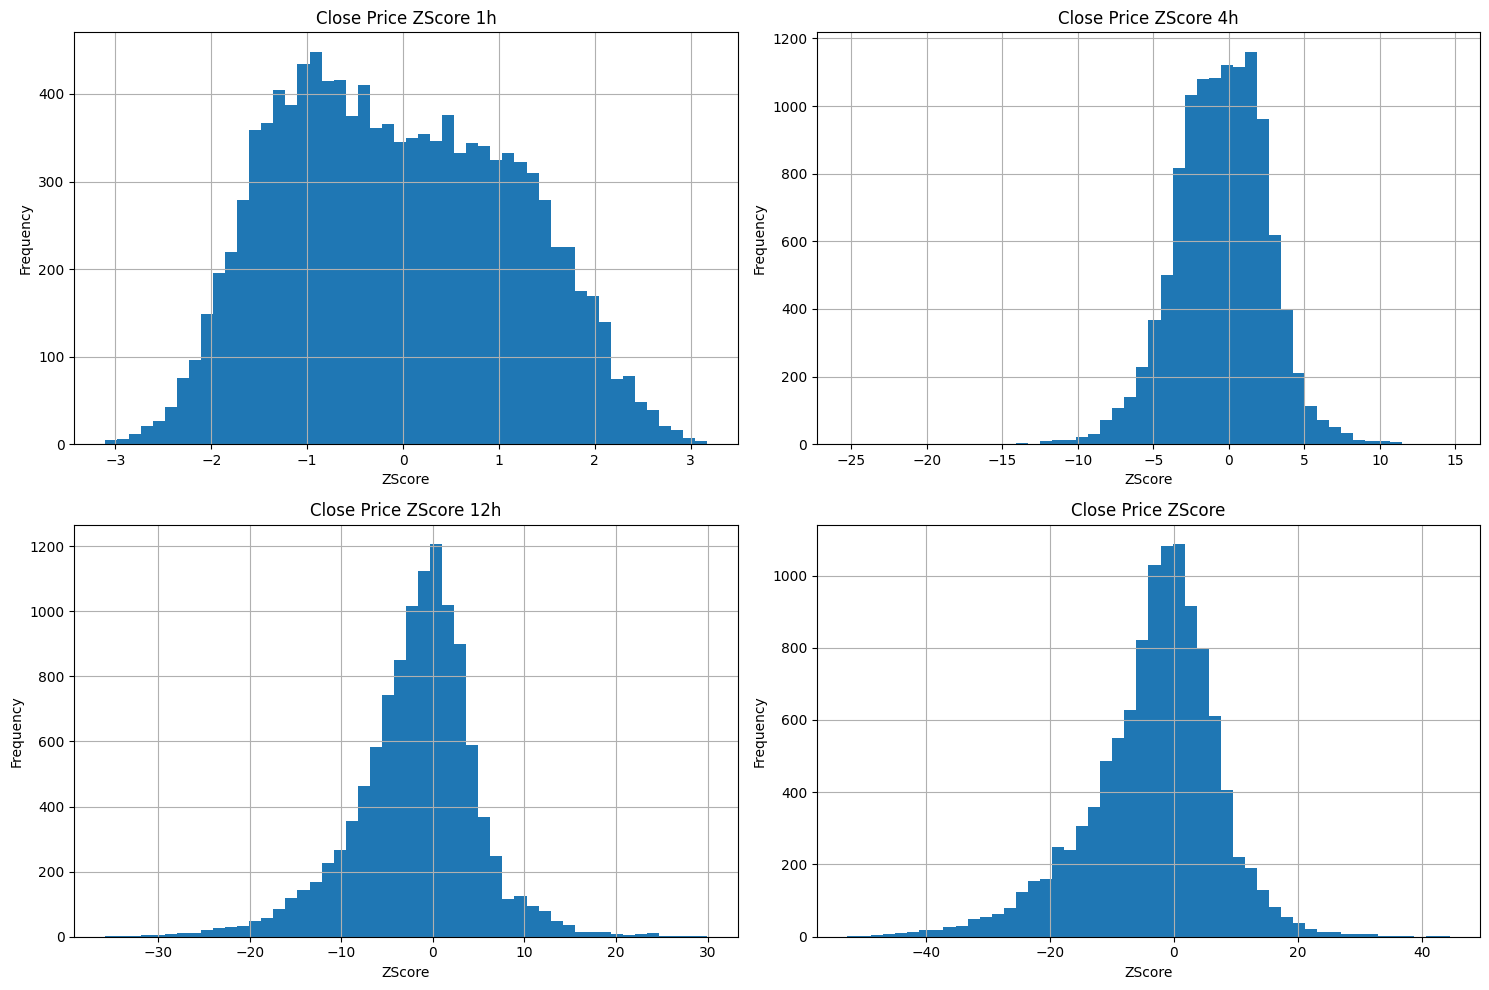

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

df_data_kline['closePrice_zscore_1h'].hist(bins=50, ax=axes[0, 0])
axes[0, 0].set_title('Close Price ZScore 1h')
axes[0, 0].set_xlabel('ZScore')
axes[0, 0].set_ylabel('Frequency')

df_data_kline['closePrice_zscore_4h'].hist(bins=50, ax=axes[0, 1])
axes[0, 1].set_title('Close Price ZScore 4h')
axes[0, 1].set_xlabel('ZScore')
axes[0, 1].set_ylabel('Frequency')

df_data_kline['closePrice_zscore_12h'].hist(bins=50, ax=axes[1, 0])
axes[1, 0].set_title('Close Price ZScore 12h')
axes[1, 0].set_xlabel('ZScore')
axes[1, 0].set_ylabel('Frequency')

df_data_kline['closePrice_zscore_24h'].hist(bins=50, ax=axes[1, 1])
axes[1, 1].set_title('Close Price ZScore')
axes[1, 1].set_xlabel('ZScore')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

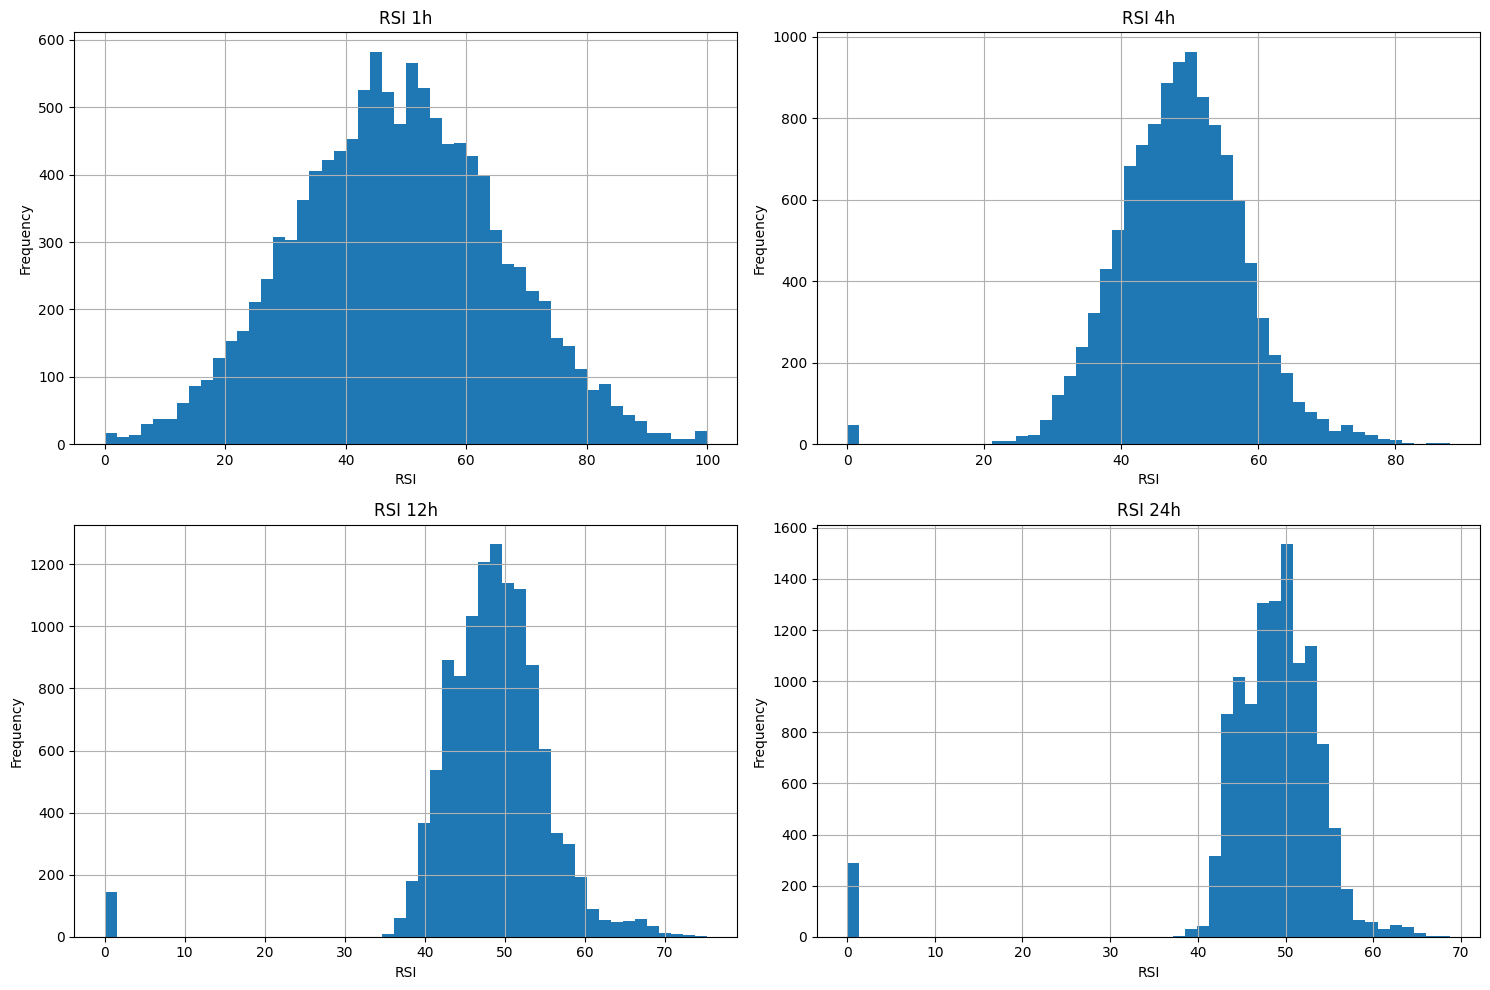

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

df_data_kline['rsi_1h'].hist(bins=50, ax=axes[0, 0])
axes[0, 0].set_title('RSI 1h')
axes[0, 0].set_xlabel('RSI')
axes[0, 0].set_ylabel('Frequency')

df_data_kline['rsi_4h'].hist(bins=50, ax=axes[0, 1])
axes[0, 1].set_title('RSI 4h')
axes[0, 1].set_xlabel('RSI')
axes[0, 1].set_ylabel('Frequency')

df_data_kline['rsi_12h'].hist(bins=50, ax=axes[1, 0])
axes[1, 0].set_title('RSI 12h')
axes[1, 0].set_xlabel('RSI')
axes[1, 0].set_ylabel('Frequency')

df_data_kline['rsi_24h'].hist(bins=50, ax=axes[1, 1])
axes[1, 1].set_title('RSI 24h')
axes[1, 1].set_xlabel('RSI')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [16]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Define open positions based on RSI and price change
open_positions = df_data_kline[(df_data_kline['rsi_1h'] > 70) & (df_data_kline['closePrice_pct_change_1h'] > 5)]

# Create a subplot with three rows: Close Price, RSI, and MACD
fig = make_subplots(
    rows=3, 
    cols=1, 
    shared_xaxes=True, 
    vertical_spacing=0.15,  # Increased spacing to avoid overlap
    row_heights=[0.5, 0.25, 0.25]  # Adjusted heights: 50% for price, 25% for RSI, 25% for MACD
)

# --- First Subplot: Close Price ---
fig.add_trace(
    go.Scatter(x=df_data_kline['startTime'], y=df_data_kline['closePrice'], mode='lines', name='Close Price'),
    row=1, col=1
)

# Add scatter points for open positions
fig.add_trace(
    go.Scatter(
        x=open_positions['startTime'], 
        y=open_positions['closePrice'], 
        mode='markers', 
        name='Open Position', 
        marker=dict(color='blue', symbol='circle')
    ),
    row=1, col=1
)

# --- Second Subplot: RSI 1h ---
fig.add_trace(
    go.Scatter(
        x=df_data_kline['startTime'], 
        y=df_data_kline['rsi_1h'], 
        mode='lines', 
        name='RSI 1h', 
        line=dict(color='orange')
    ),
    row=2, col=1
)

# --- Third Subplot: MACD ---
# MACD Line
fig.add_trace(
    go.Scatter(
        x=df_data_kline['startTime'], 
        y=df_data_kline['macd_line'], 
        mode='lines', 
        name='MACD Line', 
        line=dict(color='blue')
    ),
    row=3, col=1
)

# Signal Line
fig.add_trace(
    go.Scatter(
        x=df_data_kline['startTime'], 
        y=df_data_kline['macd_signal'], 
        mode='lines', 
        name='Signal Line', 
        line=dict(color='red')
    ),
    row=3, col=1
)

# Histogram
fig.add_trace(
    go.Bar(
        x=df_data_kline['startTime'], 
        y=df_data_kline['macd_histogram'], 
        name='MACD Histogram', 
        marker=dict(color='grey', opacity=0.5)
    ),
    row=3, col=1
)

# --- Highlight MACD Crossovers (Trend Switching Points) ---
# Find crossover points (bullish: MACD crosses above signal, bearish: MACD crosses below signal)
crossovers = []
for i in range(1, len(df_data_kline)):
    prev_macd = df_data_kline['macd_line'].iloc[i-1]
    curr_macd = df_data_kline['macd_line'].iloc[i]
    prev_signal = df_data_kline['macd_signal'].iloc[i-1]
    curr_signal = df_data_kline['macd_signal'].iloc[i]
    
    # Bullish crossover: MACD crosses above signal
    if prev_macd <= prev_signal and curr_macd > curr_signal:
        crossovers.append((df_data_kline['startTime'].iloc[i], df_data_kline['closePrice'].iloc[i], 'Bullish'))
    # Bearish crossover: MACD crosses below signal
    elif prev_macd >= prev_signal and curr_macd < curr_signal:
        crossovers.append((df_data_kline['startTime'].iloc[i], df_data_kline['closePrice'].iloc[i], 'Bearish'))

# Add crossover points to the close price chart
for crossover in crossovers:
    time, price, trend = crossover
    color = 'green' if trend == 'Bullish' else 'red'
    fig.add_trace(
        go.Scatter(
            x=[time], 
            y=[price], 
            mode='markers', 
            name=f'{trend} Crossover', 
            marker=dict(color=color, symbol='triangle-up', size=10),
            showlegend=False
        ),
        row=1, col=1
    )

# Update layout for better interactivity and enable autoranging for y-axes
fig.update_layout(
    title='Close Price with RSI 1h and MACD',
    xaxis_title='Time',
    yaxis_title='Close Price',
    xaxis2_title='Time',
    yaxis2_title='RSI 1h',
    xaxis3_title='Time',
    yaxis3_title='MACD',
    xaxis_rangeslider_visible=True,  # Add a range slider for zooming
    template='plotly_white',
    # Enable autoranging for all y-axes
    yaxis=dict(autorange=True),  # Close Price y-axis
    yaxis2=dict(autorange=True),  # RSI y-axis (remove fixed range)
    yaxis3=dict(autorange=True, zeroline=True, zerolinecolor='black', zerolinewidth=1),  # MACD y-axis with zero line
    height=900  # Increase overall height for better visibility
)

# Show the interactive plot
fig.show()